## SERIES DE TIEMPO PARA PRONÓSTICOS EN ECONOMÍA Y FINANZAS
### CLASE 2: Construcción de Modelos de predicción y su uso

<div style="text-align: right"> Elaborado por Jorge Guerra </div>
<div style="text-align: right"> @jguerrae18 </div>
<div style="text-align: right"> ja.guerrae@uniandes.edu.co </div>

In [10]:
import warnings
warnings.filterwarnings("ignore")

> **¿Qué haremos el día de hoy?**

A partir de una base de datos de salarios proveniente del texto base del curso, Deabold (2017), vamos a realizar ejercicios que nos ayuden a responder ciertas preguntas clave y a familiarizarnos con el procedimiento estadístico para la predicción. Inicialmente en datos de corte transversal y posteriormente en series de tiempo. La clase tiene el siguiente contenido:

0. Datos.
1. Analisis estadistico básico.
2. Gráficas para entender mejor los datos.
3. Análisis de regresion.
4. Definamos cual de los dos modelos es mejor:
    - Simulaciones.
    - Errores Normales.	
    - Estimación con errores normales e incertidumbre en los parámetros	.
    - Estimación no parametrizada en los errores y sin incertidumbre en los parametros.
    - Desempeño fuera de muestra.	
---


## 0. Datos

Los datos corresponden a los salarios de 1324 personas en Estados Unidos Estos datos provienen del libro de texto de la clase y tienen diferentes variables cualitativas:

- Genero
- Pertenecer a un sindicato
- Color de la piel

Las columnas en los datos son las siguientes:
- WAGE     - salario
- EDUC     - Nivel educativo
- Exper    - Experiencia profesional estimada
- Female   - Es mujer u Hombre
- UNION    - Pertence a un sindicato o no
- NONWHITE - Negro o Blanco
- AGE      - Edad de la persona

Para empezar a leer los datos necesitamos una librería muy  popular en Python llamada [Pandas](https://pandas.pydata.org/). Para importar la libreria y leer la base ejecutamos el siguiente código:

In [11]:
import pandas as pd #<-- importar la libreria con el shortcut "pd" pero también podría ser "pds"

In [12]:
df = pd.read_excel("DataWages.xlsx") #<-- Leemos el excel

Con el método `pd.read_excel()` es posible leer la base y con VSCode al teclear `pd.` se muestran en pantalla las diferentes funciones que se pueden aplicar con el paquete, incluyendo `read_excel` o `read_stata`, pues el paquete permite importar (y exportar) bases de datos en distintos formatos. 


<img src="pd_punto.png" alt="drawing" style="width:500px;"/>

Posteriormente, después de haber escrito  `pd.read_excel()`, al poner el cursos dentro de los corchetes es posible ver los distintos argumentos de la función, equivalente a usar  `pd.read_excel?`. Esto se ve de la siguiente forma:

<img src="pd_read_excel.png" alt="drawing" style="width:500px;"/>

In [13]:
df.iloc[0, 0]

7.0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   WAGE      1323 non-null   float64
 1   EDUC      1323 non-null   int64  
 2   EXPER     1323 non-null   int64  
 3   FEMALE    1323 non-null   object 
 4   UNION     1323 non-null   object 
 5   NONWHITE  1323 non-null   object 
 6   AGE       1323 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 72.5+ KB


Con el método `df.head()` y `df.info()` obtenemos una vista de las primeras 5 filas y los metadatos de cada columna del dataframe respectivamente. Como se observa: UNION, NONWHITE y FEMALE SON CATEGORICAS.

---

## 1. Análisis estadistico

En este punto analizaremos las principales estadísticas descriptivas de los datos. Para esto primero convertiremos las variables de UNION, NONWHITE y FEMALE en categóricas y después le pedimos a MATLAB que haga los cálculos de las estadísticas descriptivas.

In [15]:
pd.get_dummies(df.UNION)

,No Sindicato,Sindicato
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1318,0,1
1319,1,0
1320,0,1
1321,1,0


con el método `pd.get_dummies` y utilizando la columna como argumentos podemos obtener tantas dummies como categorias existan en la columnam obteniendo un dataframe de columnas dummies. En este caso nos quedaremos con la segunda.

In [16]:
df.UNION = pd.get_dummies(df.UNION)["Sindicato"]
df.FEMALE = pd.get_dummies(df["FEMALE"])["Mujer"]
df["NON_WHITE"] = pd.get_dummies(df["NONWHITE"])["Blanco"]

In [17]:
df.head()

,WAGE,EDUC,EXPER,FEMALE,UNION,NONWHITE,AGE,NON_WHITE
0,7.000,16,24,1,0,Blanco,46,1
1,13.500,12,36,1,0,Blanco,54,1
2,15.350,20,16,1,0,Blanco,42,1
3,23.125,12,21,0,0,Blanco,39,1
4,12.000,18,30,0,0,Blanco,54,1


Con el método `pd.describe` obtenemos las estadísticas descriptivas:

In [18]:
df.describe()

,WAGE,EDUC,EXPER,FEMALE,UNION,AGE,NON_WHITE
count,1323.00000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,12.18780,13.118670,19.198035,0.492063,0.163265,38.316704,0.845049
std,7.38445,2.743493,11.895222,0.500126,0.369747,11.640554,0.361995
min,1.43000,1.000000,-1.000000,0.000000,0.000000,18.000000,0.000000
25%,7.00000,12.000000,9.000000,0.000000,0.000000,29.000000,1.000000
50%,10.00000,12.000000,19.000000,0.000000,0.000000,38.000000,1.000000
75%,15.35000,16.000000,27.000000,1.000000,0.000000,47.000000,1.000000
max,65.00000,20.000000,56.000000,1.000000,1.000000,65.000000,1.000000


## 2. Análisis gráfico

Hagamos algunas gráficas para ver el comportamiento general de las variables.Inicialmente repliquemos las gráficas del libro de Diebold de distribución salarial (Figura 4.1., página 83).

In [19]:
import matplotlib.pyplot as plt #importamos paquetes para gráficar
import seaborn as sns #importamos paquetes para gráficar
import numpy as np #importar paquete de 

#DESCRIPCIÓN MÁS AMIGABLE

Puede encontrar más información sobre estos paquetes aquí:
- Matplotlib: https://matplotlib.org/
- Seaborn: https://seaborn.pydata.org/
- Numpy:https://numpy.org/


In [20]:
df["L_WAGE"] = np.log(df.WAGE)

### Histogramas

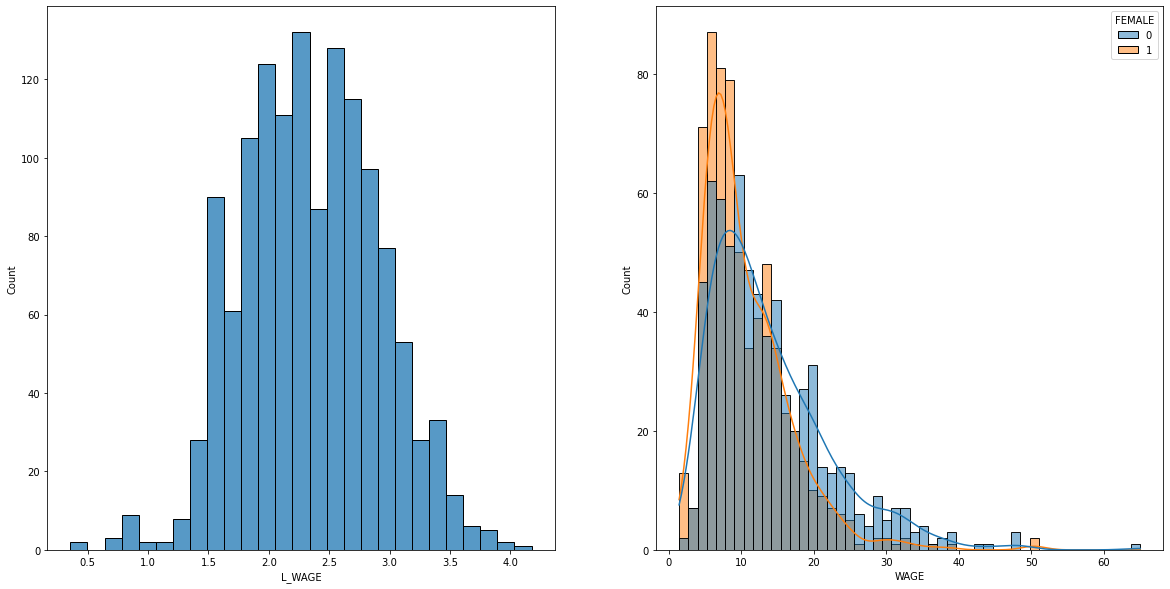

In [21]:
fig, ax =plt.subplots(1,2,figsize=(20,10)) #definimos las subfiguras, 
#en este caso son 1 fila y dos columnas con un tamaño de 20px de ancho y 10px.

sns.histplot(df["L_WAGE"], ax=ax[0]) #definimos parámetros y 
sns.histplot(data = df, x = "WAGE", ax=ax[1], bins = 50, kde = True, hue = 'FEMALE')
#es posible ajustar distintos parámetros.

fig.show()

Para más información puede revisar en estos links: 
- https://seaborn.pydata.org/tutorial/distributions.html
- https://www.sharpsightlabs.com/blog/seaborn-histogram/

### Ajuste de la distribución

In [22]:
from scipy.stats import norm #función de scipy (paquete de ciencia computacional) 
#para hacer el fit a la distribución norma

Para más información de scipy puede consultar [aquí](https://scipy.org/)

In [23]:
norm.fit(df.WAGE) #EL OUTPUY MEDIA Y DESVIACIÓN ESTANDAR DE LOS SALARIOS

(12.18779972797808, 7.381659055236993)

#### Salario

In [24]:
mu, std = norm.fit(df.WAGE)

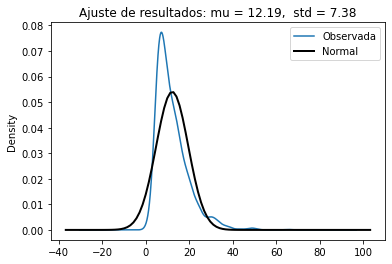

In [25]:
#Kernel de la distribución observada de los salarios
df.WAGE.plot.kde()

#Kernel de la distribución teórica
xmin, xmax = plt.xlim() #limites de x 
x = np.linspace(xmin, xmax, 100) #grilla uniforme de x
p = norm.pdf(x, mu, std) #PDF calculada a partir de los momentos obervados


plt.plot(x, p, 'k', linewidth=2, label = "Normal")

#parametros
title = "Ajuste de resultados: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.gca().legend(('Observada','Normal'))

plt.show()

#### Log Salario

In [26]:
norm.fit(df.L_WAGE) #MEDIA Y DESVIACIÓN ESTANDAR DE LOS LOG SALARIOS
mu, std = norm.fit(df.L_WAGE)

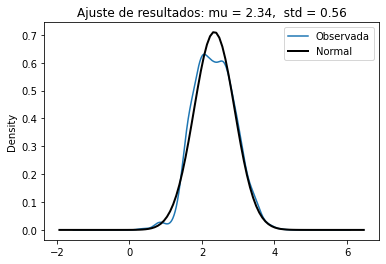

In [27]:
#Kernel de la distribución observada de los salarios
df.L_WAGE.plot.kde()

#Kernel de la distribución teórica
xmin, xmax = plt.xlim() #limites de x 
x = np.linspace(xmin, xmax, 100) #grilla uniforme de x
p = norm.pdf(x, mu, std) #PDF calculada a partir de los momentos obervados
plt.plot(x, p, 'k', linewidth=2, label = "Normal")

#parametros
title = "Ajuste de resultados: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.gca().legend(('Observada','Normal'))

plt.show()

### Scatterplots

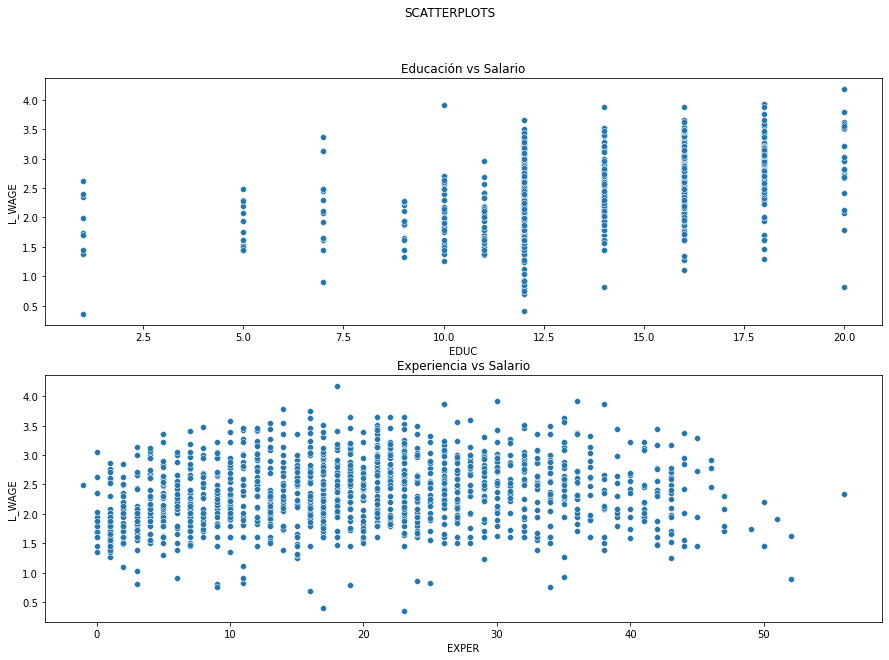

In [28]:
fig, ax =plt.subplots(2,1, figsize=(15,10), sharex = False)
fig.suptitle('SCATTERPLOTS')

ax[0].set_title('Educación vs Salario')
ax[1].set_title('Experiencia vs Salario')

sns.scatterplot(data=df, x="EDUC", y="L_WAGE", ax = ax[0])
sns.scatterplot(data=df, x="EXPER", y="L_WAGE", ax = ax[1])

# sns.relplot(x="EDUC", y="L_WAGE", data=df)

fig.show()

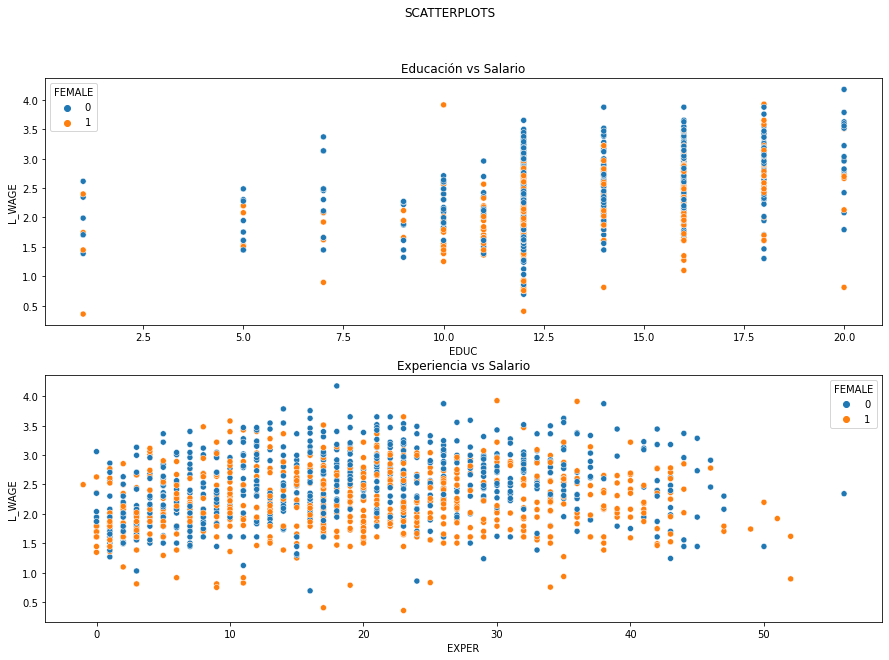

In [29]:
## DIFERENCIANDO POR SEXO

fig, ax =plt.subplots(2,1, figsize=(15,10), sharex = False)
fig.suptitle('SCATTERPLOTS')

ax[0].set_title('Educación vs Salario')
ax[1].set_title('Experiencia vs Salario')

sns.scatterplot(data=df, x="EDUC", y="L_WAGE", ax = ax[0], hue = "FEMALE")
sns.scatterplot(data=df, x="EXPER", y="L_WAGE", ax = ax[1], hue = "FEMALE")

# sns.relplot(x="EDUC", y="L_WAGE", data=df)

fig.show()


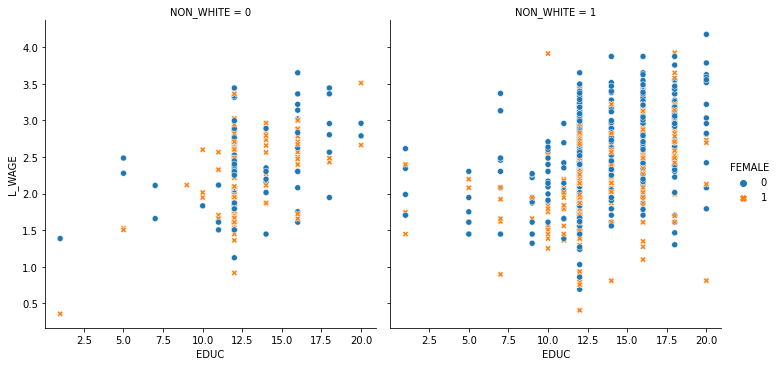

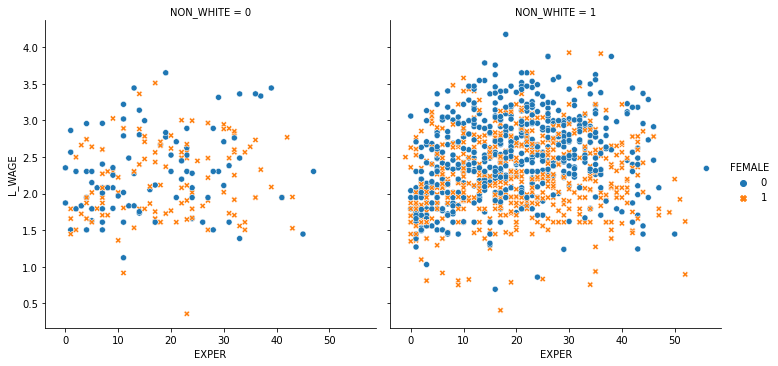

In [30]:
#DIFERENCIANDO POR SEXO Y RAZA

sns.relplot( data=df, x="EDUC", y="L_WAGE", col="NON_WHITE", 
            hue = "FEMALE", style = "FEMALE", kind="scatter")

sns.relplot( data=df, x="EXPER", y="L_WAGE", col="NON_WHITE", 
            hue = "FEMALE", style = "FEMALE", kind="scatter")

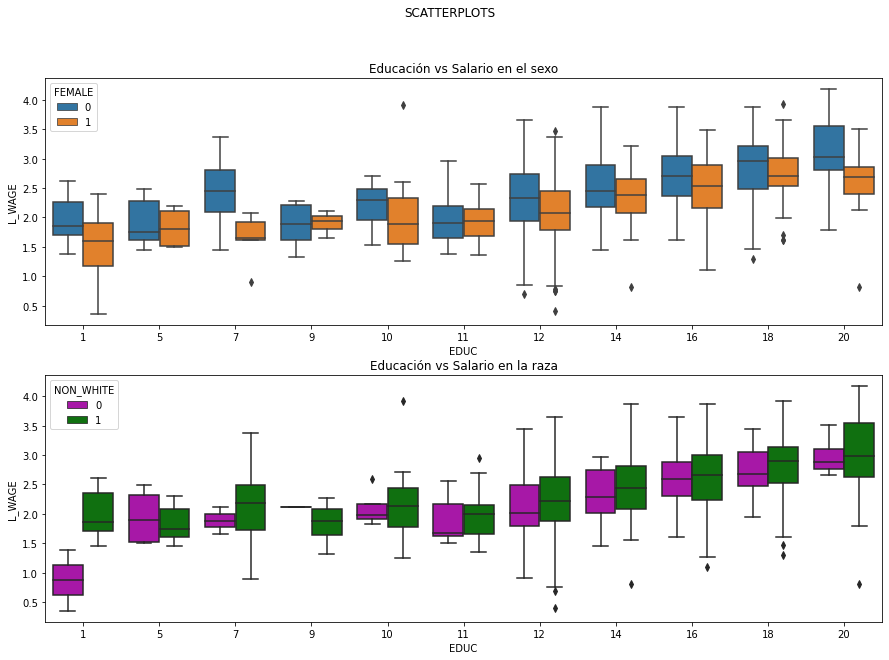

In [31]:

fig, ax =plt.subplots(2,1, figsize=(15,10), sharex = False)
fig.suptitle('SCATTERPLOTS')

ax[0].set_title('Educación vs Salario en el sexo')
ax[1].set_title('Educación vs Salario en la raza')

sns.boxplot(x="EDUC", y="L_WAGE", hue="FEMALE", data=df, ax = ax[0])

sns.boxplot(x="EDUC", y="L_WAGE", hue="NON_WHITE", palette=["m", "g"], data=df, ax = ax[1])

# sns.relplot(x="EDUC", y="L_WAGE", data=df)

fig.show()

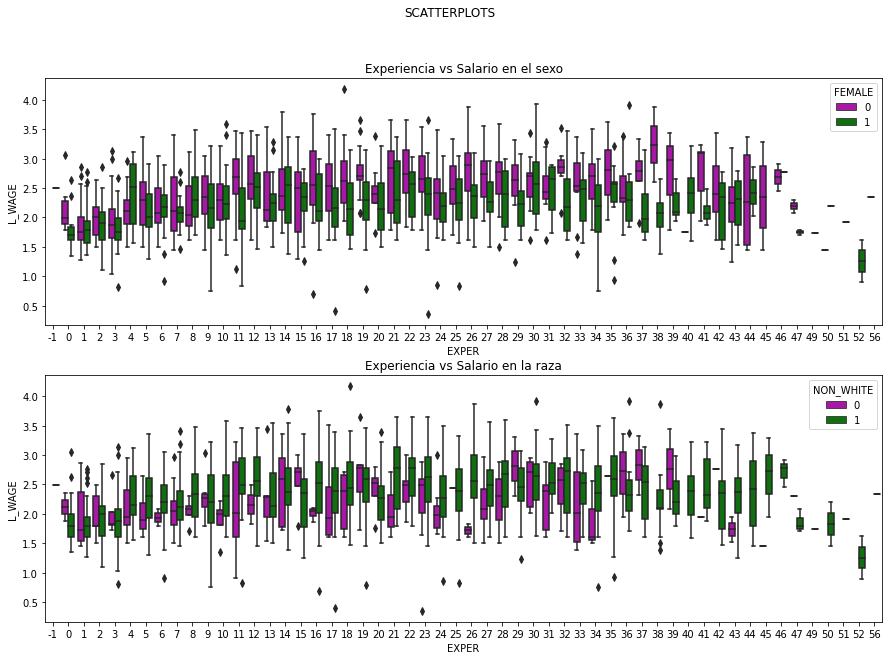

In [32]:
fig, ax =plt.subplots(2,1, figsize=(15,10), sharex = False)
fig.suptitle('SCATTERPLOTS')

ax[0].set_title('Experiencia vs Salario en el sexo')
ax[1].set_title('Experiencia vs Salario en la raza')

sns.boxplot(x="EXPER", y="L_WAGE", hue="FEMALE", palette=["m", "g"], data=df, ax = ax[0])

sns.boxplot(x="EXPER", y="L_WAGE", hue="NON_WHITE", palette=["m", "g"], data=df, ax = ax[1])

# sns.relplot(x="EDUC", y="L_WAGE", data=df)

fig.show()

## 3. Análisis de regresión

Se especificaran las siguientes regresiones:

$$Log(W)=\beta_0+\beta_1\times EDUC+\beta_2\times EXPER+\varepsilon$$

$$Log(W)=beta_{0} +\beta_{1}\times EDUC+beta_{2}\times EXPER+\beta_{3}\times Exper^{2}+\varepsilon $$

#### Forma 1: Statmodels

Statsmodels es un módulo de Python que proporciona clases y funciones para la estimación de muchos modelos estadísticos diferentes, así como para realizar pruebas estadísticas y exploración de datos estadísticos. Hay disponible una extensa lista de estadísticas de resultados para cada estimador. Los resultados se comparan con los paquetes estadísticos existentes para garantizar que sean correctos. 

Este paquete es el más parecido a la interfaz que ofrece Stata o R, dado que arroja los resultados de regresión con los estadísticos principales.

La documentación en línea está alojada en https://www.statsmodels.org/.

Si quiere ver el paper del paquete lo puede consultar:

Seabold, Skipper, and Josef Perktold. [“statsmodels: Econometric and statistical modeling with python.”](http://conference.scipy.org/proceedings/scipy2010/pdfs/seabold.pdf) Proceedings of the 9th Python in Science Conference. 2010.

In [33]:
import statsmodels.api as sm #IMPORTAR EL PAQUETE

In [34]:
df["EXPER_2"] = df["EXPER"]**2 #CREAR LA EXPERIENCIA AL CUADRADO

In [35]:
X1 = sm.add_constant(df[["EDUC", "EXPER"]]) #añadir constante al conjunto de x's de la primera espeificación
X2 = sm.add_constant(df[["EDUC", "EXPER", "EXPER_2"]]) #añadir constante al conjunto de x's de la primera espeificación
Y = df["L_WAGE"]

model1 = sm.OLS(Y, X1).fit() #ESTIMAR EL MODELO
print(model1.summary()) #OUPUT DE LOS PRINCIPALES RESULTADOS

                            OLS Regression Results                            
Dep. Variable:                 L_WAGE   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     199.6
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           1.80e-76
Time:                        20:00:30   Log-Likelihood:                -938.24
No. Observations:                1323   AIC:                             1882.
Df Residuals:                    1320   BIC:                             1898.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8674      0.075     11.514      0.0

In [36]:
model2 = sm.OLS(Y, X2).fit() #ESTIMAR SEGUNDA ESPECIFICACIÓN
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 L_WAGE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           3.36e-85
Time:                        20:00:30   Log-Likelihood:                -915.24
No. Observations:                1323   AIC:                             1838.
Df Residuals:                    1319   BIC:                             1859.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7783      0.075     10.349      0.0

### Forma 2: ScikitLearn

Scikit-learn (anteriormente scikits.learn) es una biblioteca para aprendizaje automático de software libre para el lenguaje de programación Python. Incluye varios algoritmos de clasificación, regresión y análisis de grupos entre los cuales están máquinas de vectores de soporte, bosques aleatorios, Gradient boosting, K-means y DBSCAN. Está diseñada para interoperar con las bibliotecas numéricas y científicas NumPy y SciPy. Puede encontrar más info aquí: https://www.statsmodels.org/stable/index.html. 

In [37]:
from sklearn.linear_model import LinearRegression #Importar el modelo
regressor = LinearRegression() #Especificarlo (se pueden ingresar varios parámetros)
regressor.fit(X1, Y) #Estimar

LinearRegression()

In [38]:
print(regressor.coef_) #Coeficientes
print(regressor.intercept_) #Interceptos

[0.         0.09322935 0.01310388]
0.8673816229506124


Como se puede notar, esta librería es un poco menos amigable para todas las estimaciones parámetricas. Sin embarg

### ¿Cuál de los dos es mejor?

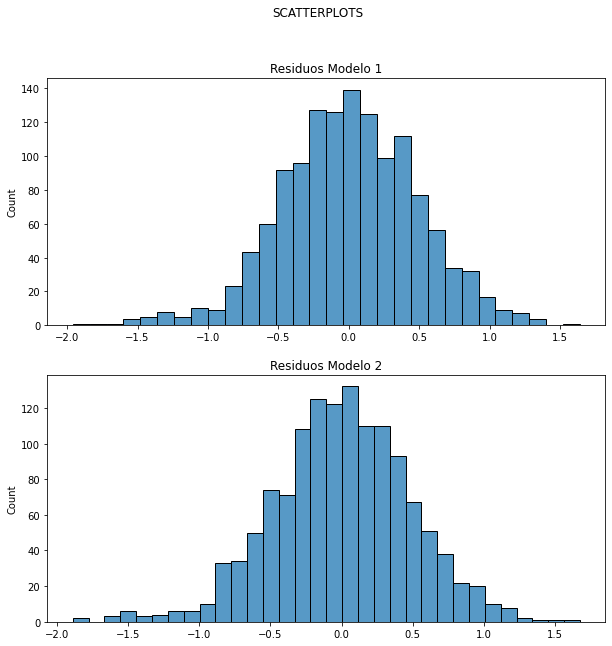

In [39]:
fig, ax =plt.subplots(2,1, figsize=(10,10), sharex = False)
fig.suptitle('SCATTERPLOTS')

ax[0].set_title('Residuos Modelo 1')
ax[1].set_title('Residuos Modelo 2')

sns.histplot(model1.resid, ax = ax[0])
sns.histplot(model2.resid, ax = ax[1])

fig.show()

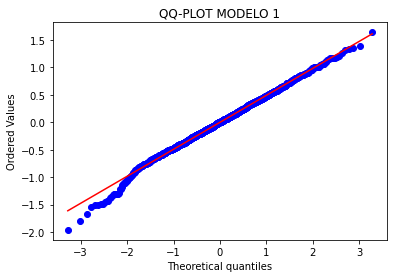

In [40]:
from scipy import stats #imporar función para la QQPLOT

stats.probplot(model1.resid, plot=sns.mpl.pyplot, dist = "norm")
plt.title("QQ-PLOT MODELO 1")
plt.show()

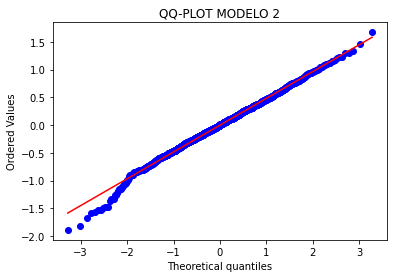

In [41]:
stats.probplot(model2.resid, plot=sns.mpl.pyplot, dist = "norm")
plt.title("QQ-PLOT MODELO 2")
plt.show()

In [42]:
l1 = [model1.rsquared, model1.rsquared_adj, model1.mse_resid, model1.aic, model1.bic] #listas con los estadísticos del modelo 1
l2 = [model2.rsquared, model2.rsquared_adj, model2.mse_resid, model2.aic, model2.bic] #listas con los estadísticos del modelo 1
pd.DataFrame(data = zip (l1, l2), index = ["R2","R2_Ajustado","MSE","AIC","SIC"], columns = ["Model1", "Model2"]) #crear un dataframe con las listas, indice (estadísticos) y nombre de las columnas (modelos)

,Model1,Model2
R2,0.232224,0.258452
R2_Ajustado,0.231061,0.256765
MSE,0.242377,0.234275
AIC,1882.471695,1838.487697
SIC,1898.034667,1859.238326


El mejor es el segundo modelo.

## 5. Simulación y predicción

### Errores Normales

In [43]:
import random
random.seed(1) #definimos la semilla

In [44]:
mu, std = norm.fit(model2.resid) #media y desviación de los residuales
RNormal = np.random.normal(mu, std, 10000) #crear los errores a partir de los momentos anteriores
betahat = model2.params #extraer los b's del modelo.

Generemos los pronostios para el modelo 2 con los valores deseados y sumemos los errores normales:
1. 10 años de educación, 1 año de experiencia.
2. 14 años de educación, 20 años de experiencia


In [45]:
LWh1_Normal=betahat[0]+10*betahat[1]+1*betahat[2]+betahat[3] #media predicha del individuo 1
LWh2_Normal=betahat[0]+14*betahat[1]+20*betahat[2]+(20**2)*betahat[3] #media predicha del individuo 2

Wage1_Normal=np.exp(RNormal+LWh1_Normal) #sumar a cada vector de errores la media de cada de individuo y luego exponenciar
Wage2_Normal=np.exp(RNormal+LWh2_Normal)

ic1_1, ic1_2 = np.percentile(Wage1_Normal, 2.5), np.percentile(Wage1_Normal, 97.5) #extraer los percentiles
ic2_1, ic2_2 = np.percentile(Wage2_Normal, 2.5), np.percentile(Wage2_Normal, 97.5)

En las anteriores línea estamos utilizando principalmente la librería numpy (`np`) para el caso de los percentiles y la exponenciación del vector.

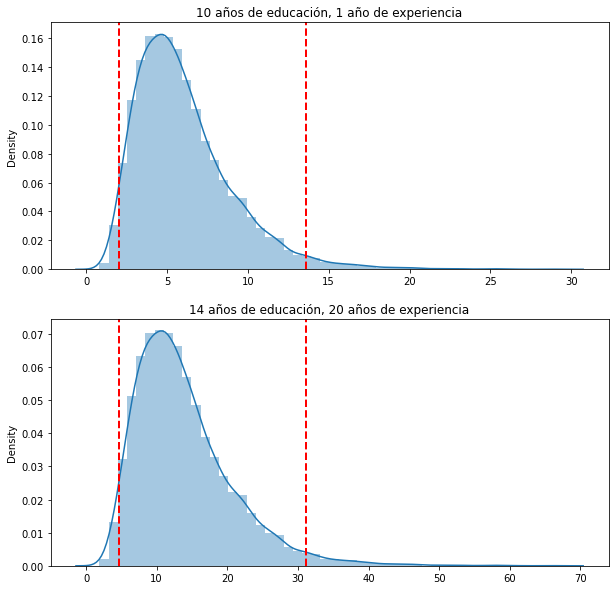

In [46]:
fig, ax =plt.subplots(2,1, figsize=(10,10), sharex = False)

#Predicción 1
ax[0].set_title('10 años de educación, 1 año de experiencia')
sns.distplot(Wage1_Normal, ax = ax[0]) #primer gráfico
ax[0].axvline(ic1_1, color='r', linestyle='--', lw=2) #lineas de confianza
ax[0].axvline(ic1_2, color='r', linestyle='--', lw=2)

#Predicción 2
ax[1].set_title('14 años de educación, 20 años de experiencia')
sns.distplot(Wage2_Normal, ax = ax[1])
ax[1].axvline(ic2_1, color='r', linestyle='--', lw=2)
ax[1].axvline(ic2_2, color='r', linestyle='--', lw=2)

fig.show()

### Estimación con errores normales e incertidumbre en los parámetros

In [47]:
coef_var = model2.cov_params()
coef_var #extraemos la varcov de los coeficientes

,const,EDUC,EXPER,EXPER_2
const,0.005655,-3.334244e-04,-8.762537e-05,1.133883e-06
EDUC,-0.000333,2.542640e-05,-2.106205e-06,7.902461e-08
EXPER,-0.000088,-2.106205e-06,1.433847e-05,-3.137824e-07
EXPER_2,0.000001,7.902461e-08,-3.137824e-07,7.556416e-09


In [48]:
RBetas = np.random.multivariate_normal(betahat, coef_var, size=10000) #generamos una distribucón normal multinomial

Imprima la estructura de `RBetas`. ¿Cuál es su dimensión?

In [49]:
Wage1_Betas= np.zeros(10000) #vectores vacios donde almacenará los valores el loop
Wage2_Betas= np.zeros(10000)

for i in range(0, 10000):
    Wage1_Betas[i] = RBetas[i][0]+10*RBetas[i][1]+1*RBetas[i][2]+RBetas[i][3] #salario para cada uno de los 10000 errores.
    Wage2_Betas[i] = RBetas[i][0]+14*RBetas[i][1]+20*RBetas[i][2]+(20**2)*RBetas[i][3]


Wage1_Betas = np.exp(Wage1_Betas)
Wage2_Betas = np.exp(Wage2_Betas)


In [50]:
ic1_1, ic1_2 = np.percentile(Wage1_Betas, 2.5), np.percentile(Wage1_Betas, 97.5)
ic2_1, ic2_2 = np.percentile(Wage2_Betas, 2.5), np.percentile(Wage2_Betas, 97.5)

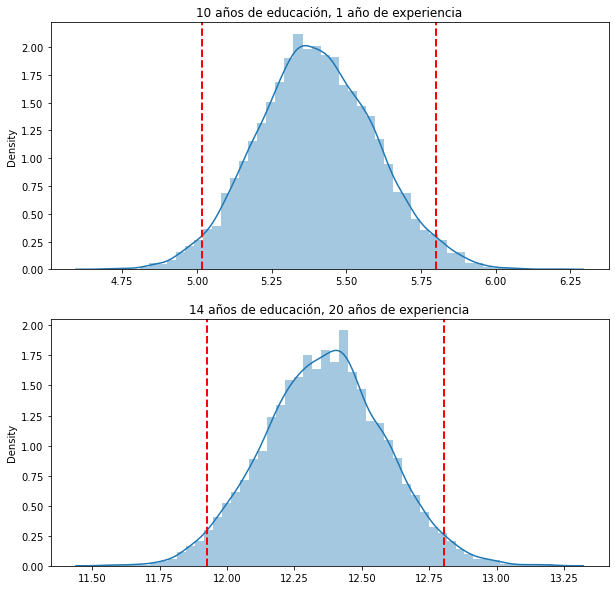

In [51]:
fig, ax =plt.subplots(2,1, figsize=(10,10), sharex = False)

#Predicción 1
ax[0].set_title('10 años de educación, 1 año de experiencia')
sns.distplot(Wage1_Betas, ax = ax[0])
ax[0].axvline(ic1_1, color='r', linestyle='--', lw=2)
ax[0].axvline(ic1_2, color='r', linestyle='--', lw=2)

#Predicción 2
ax[1].set_title('14 años de educación, 20 años de experiencia')
sns.distplot(Wage2_Betas, ax = ax[1])
ax[1].axvline(ic2_1, color='r', linestyle='--', lw=2)
ax[1].axvline(ic2_2, color='r', linestyle='--', lw=2)

### Estimación no parametrizada en los errores y sin incertidumbre en los parámetros

In [52]:
from random import choices

RNoP  = choices(model1.resid, k=10000) #función para la escogencia de 10000 errores con reeemplazo

In [53]:
Wage1_NoP=np.exp(RNoP+LWh1_Normal)
Wage2_NoP=np.exp(RNoP+LWh2_Normal)

ic1_1, ic1_2 = np.percentile(Wage1_NoP, 2.5), np.percentile(Wage1_NoP, 97.5)
ic2_1, ic2_2 = np.percentile(Wage2_NoP, 2.5), np.percentile(Wage2_NoP, 97.5)

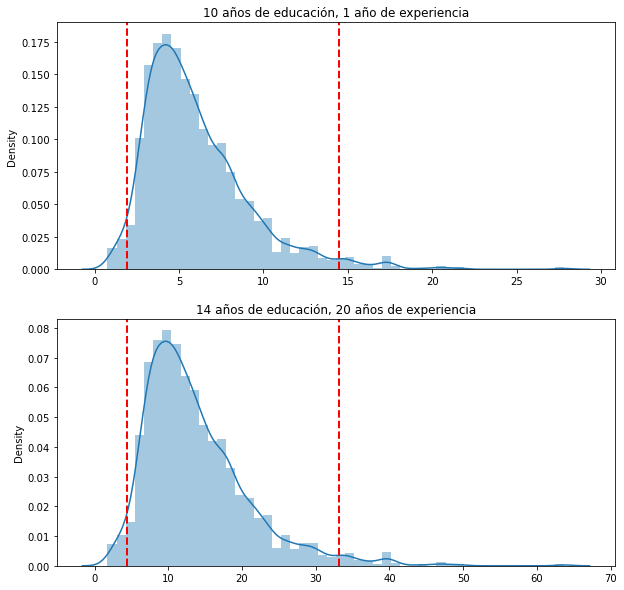

In [54]:
fig, ax =plt.subplots(2,1, figsize=(10,10), sharex = False)

#Predicción 1
ax[0].set_title('10 años de educación, 1 año de experiencia')
sns.distplot(Wage1_NoP, ax = ax[0])
ax[0].axvline(ic1_1, color='r', linestyle='--', lw=2)
ax[0].axvline(ic1_2, color='r', linestyle='--', lw=2)

#Predicción 2
ax[1].set_title('14 años de educación, 20 años de experiencia')
sns.distplot(Wage2_NoP, ax = ax[1])
ax[1].axvline(ic2_1, color='r', linestyle='--', lw=2)
ax[1].axvline(ic2_2, color='r', linestyle='--', lw=2)